In [2]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def LeerArchivos():
    # Crear una ventana raíz
    root = tk.Tk()
    root.withdraw()  # Ocultar la ventana principal

    # Abrir un cuadro de diálogo para seleccionar un archivo CSV
    file_path = filedialog.askopenfilename(
        title="Selecciona un archivo CSV",
        filetypes=(("CSV files", "*.csv"), ("Todos los archivos", "*.*"))
    )

    # Mostrar la ruta del archivo seleccionado
    print(f"Archivo seleccionado: {file_path}")

    # Cerrar la ventana raíz
    root.destroy()
        
    if file_path:  # Verificar si se seleccionó un archivo
        try:
            df = pd.read_csv(file_path)
        except Exception as e:
            print(f"Error al leer el archivo: {e}")
    else:
        print("No se seleccionó ningún archivo.")
        
    # Poner fechas en los índices del dataframe
    df.index = pd.to_datetime(df.iloc[:,0])
    # Completar las fechas
    f0 = df.index.min()
    f1 = df.index.max()
    f = pd.date_range(start=f0, end=f1, freq='D')
    df = df.reindex(f)
    df = df.iloc[:,1:]
        
    return df

In [6]:
def Grafica():
    
    # Detectar los datos vacios
    DatosInt = df.notnull().astype(int)
    DatosInt = DatosInt.replace(0, np.nan)
    
    # Crear un diccionario para almacenar los DataFrames por año
    years = DatosInt.index.year.unique()
    dataframes_by_year = {}
    faltantes = 0
    
    # Crear un DataFrame para cada año
    for year in years:
        dataframes_by_year[year] = DatosInt[DatosInt.index.year == year]
        
    for i in range(min(dataframes_by_year.keys()),max(dataframes_by_year.keys())):
        df_y = dataframes_by_year[i]
        null_count = df_y.iloc[:,0].isnull().sum()
        faltantes = faltantes + null_count
        plt.figure()
        plt.plot(df_y.index, df_y, linewidth = 3)
        plt.title(f'Valores para el año {i}\n Datos faltantes: {null_count}')
    
    print(f'Los datos faltantes totales en la base de datos son: {faltantes} de {df.shape[0]}')
    return DatosInt

Archivo seleccionado: C:/Users/juanj/OneDrive/Documentos/FONAG/PAPALLACTA/H42_Nivel de agua_Diario.csv
Los datos faltantes totales en la base de datos son: 524 de 4083


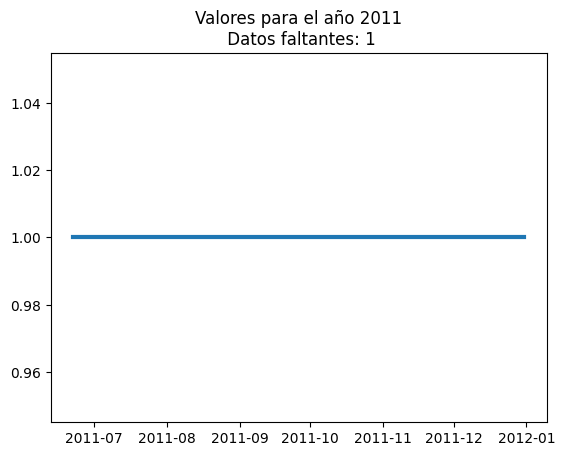

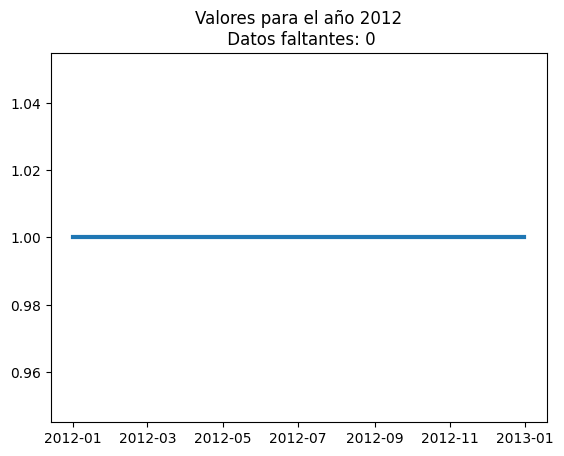

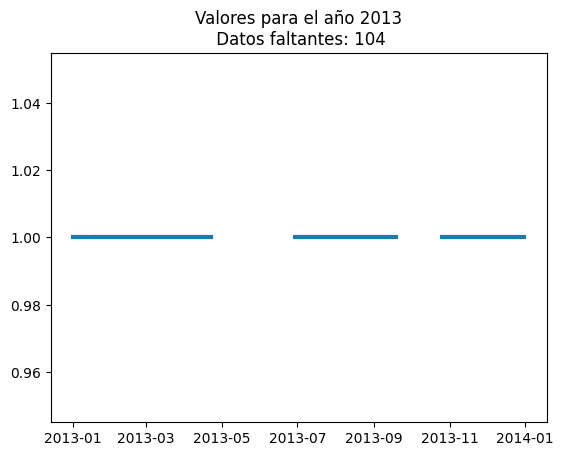

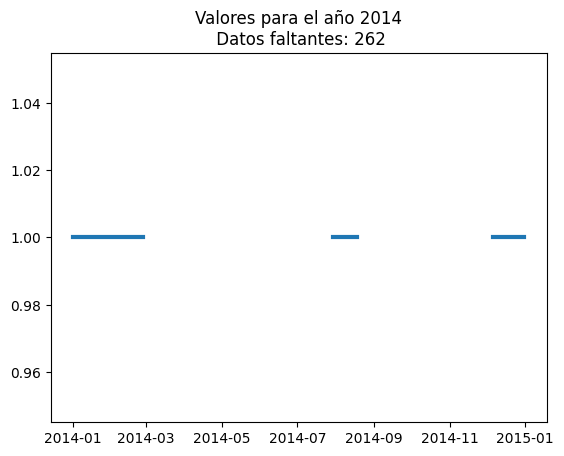

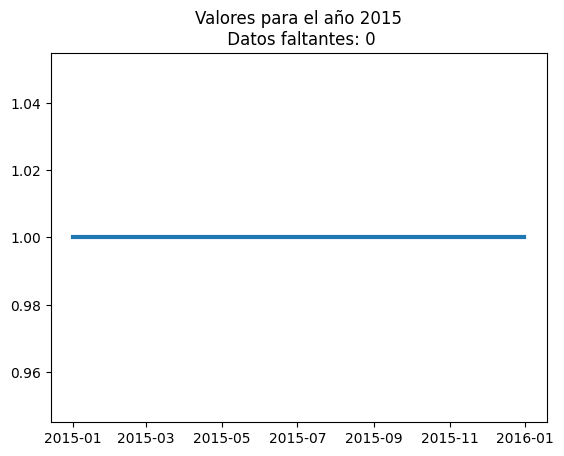

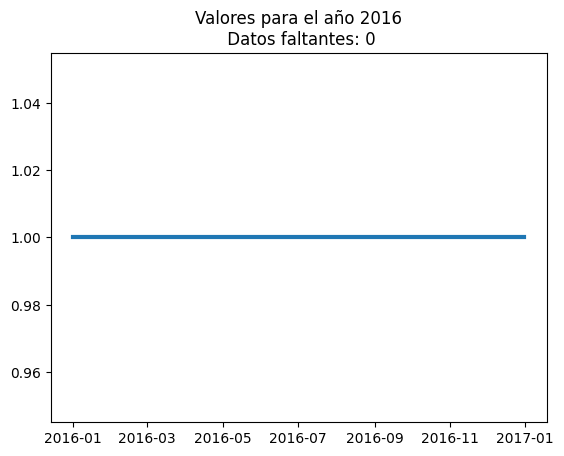

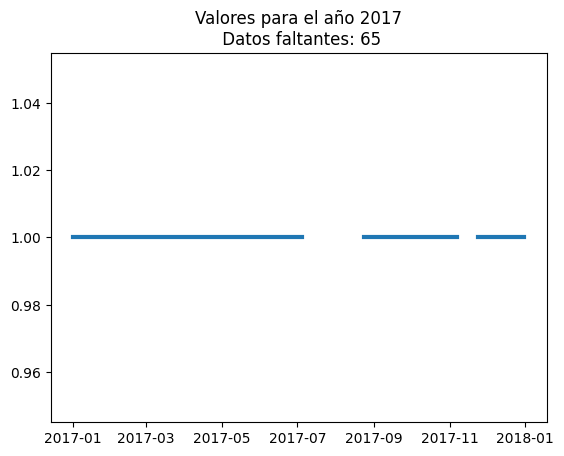

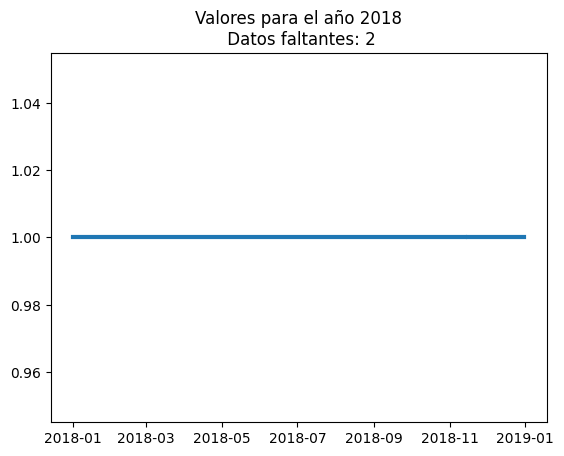

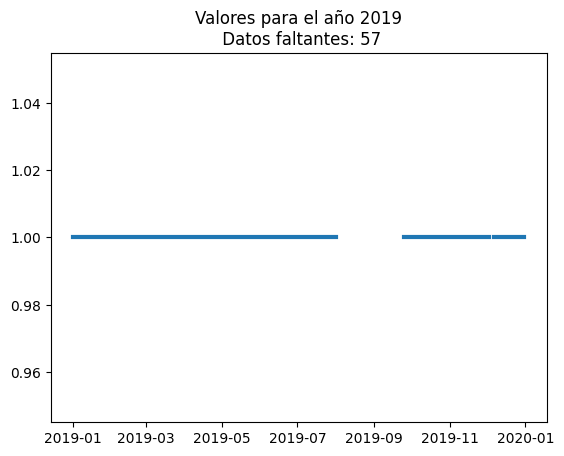

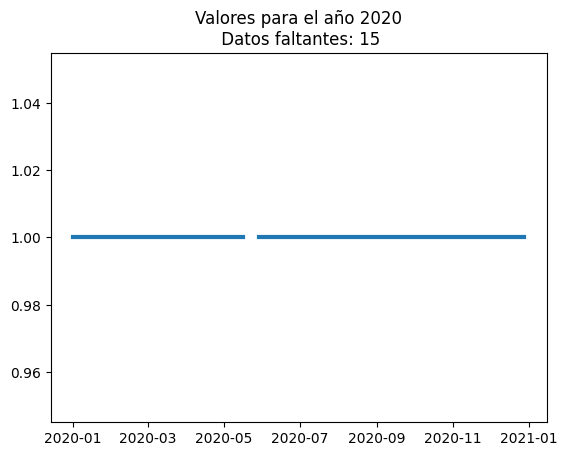

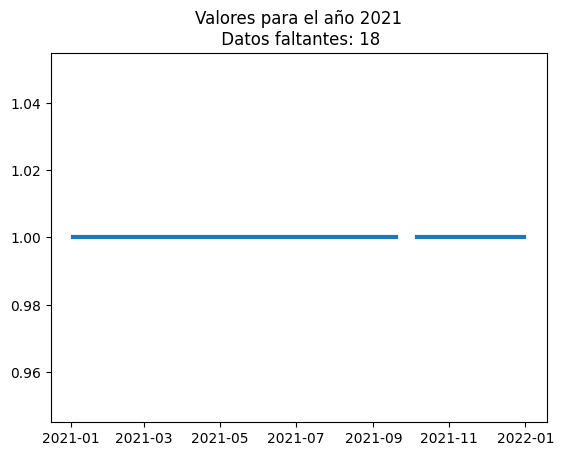

In [10]:
df = LeerArchivos()
DatosInt = Grafica()